<a href="https://colab.research.google.com/github/sravanibandreddy/deep-learning/blob/main/dl_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

design a neural network for classifying movie reviews (Binary Classification)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6982 - loss: 0.6071 - val_accuracy: 0.8408 - val_loss: 0.4021
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8555 - loss: 0.3657 - val_accuracy: 0.8504 - val_loss: 0.3493
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8674 - loss: 0.3255 - val_accuracy: 0.8600 - val_loss: 0.3387
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8732 - loss: 0.3075 - val_accuracy: 0.8632 - val_loss: 0.3343
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8768 - loss: 0.2984 - val_accuracy: 0.8576 - val_loss: 0.3382
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8784 - loss: 0.2966 - val_accuracy: 0.8582 - val_loss: 0.3387
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8799 - loss: 0.2935 - val_accuracy: 0.8592 - val_loss: 0.3384
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8809 - loss: 0.2870 - val_accuracy: 0.8590 - v

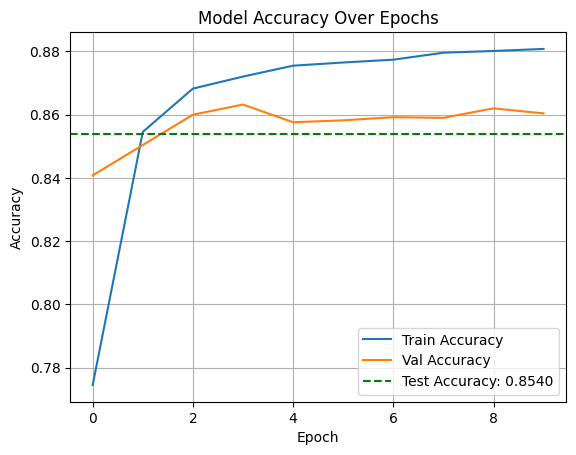

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
(train_data,train_labels),(test_data,test_labels)=imdb.load_data(num_words=1000)
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
  results=np.zeros((len(sequences),dimension))
  for i,sequence in enumerate(sequences):
    results[i,sequence]=1
  return results
# Vectorixw Training Dara
X_train =vectorize_sequences(train_data)

# Vectorize Testing Data
X_test=vectorize_sequences(test_data)

X_train[0]

X_train.shape

y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

model=Sequential([
    Dense(16,activation='relu',input_shape=(10000,)),
    Dense(16,activation='relu'),
    Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history=model.fit(X_train,y_train,
                  epochs=10,
                  batch_size=512,
                  validation_split=0.2,)
# Evaluate on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.axhline(y=test_accuracy, color='green', linestyle='--', label=f'Test Accuracy: {test_accuracy:.4f}')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

